# Import Libraries/Modules needed for the Twitter Sentiment Analysis

In [1]:
from IPython.display import Image
from IPython.display import IFrame
from IPython import display
import pandas as pd
import numpy as np

import nltk
import sklearn
import csv
%matplotlib inline

from nltk import TreebankWordTokenizer, SnowballStemmer, PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import string
import urllib
import math
import re

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Read the data (i.e. train and test data)

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
test_df = pd.read_csv('test.csv')

In [5]:
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [7]:
train_df['message']

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
15814    RT @ezlusztig: They took down the material on ...
15815    RT @washingtonpost: How climate change could b...
15816    notiven: RT: nytimesworld :What does Trump act...
15817    RT @sara8smiles: Hey liberals the climate chan...
15818    RT @Chet_Cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object

# Explore Dataset

<AxesSubplot:xlabel='sentiment', ylabel='count'>

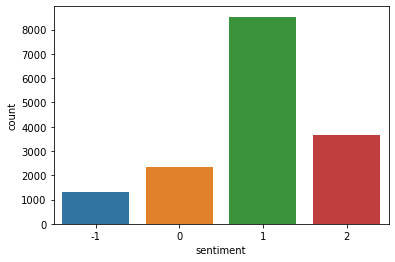

In [8]:
sns.countplot(train_df['sentiment'])

# Visualize the tweets through wordcloud

In [9]:
!pip install WordCloud
from wordcloud import WordCloud

In [10]:
tweets = train_df['message'].tolist()

In [11]:
tweets_as_one_string = "".join(tweets)

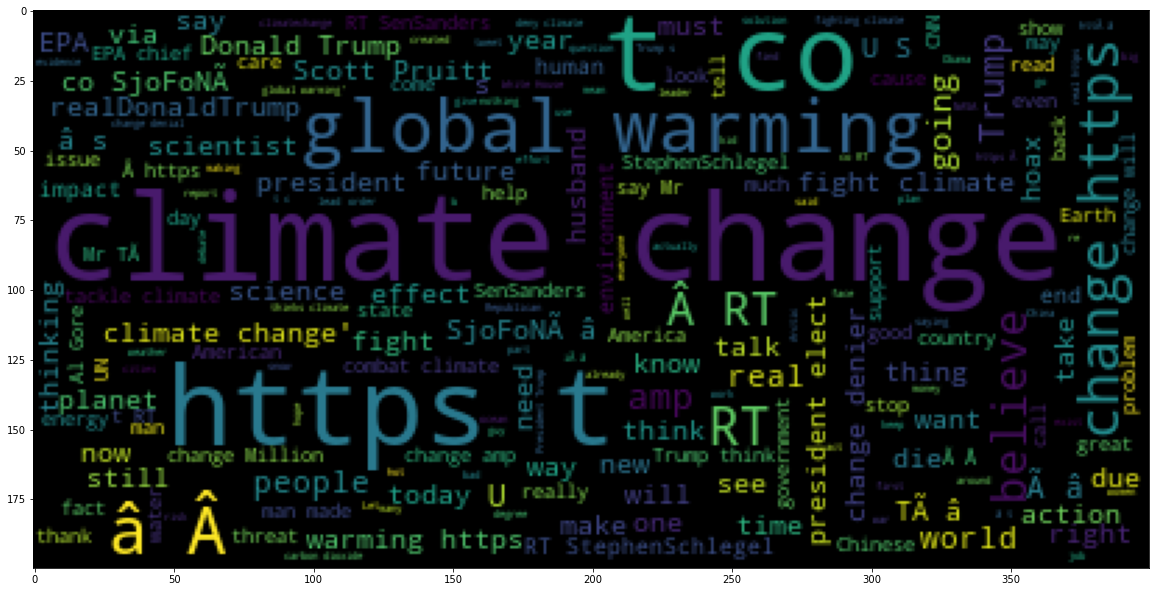

In [12]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(tweets_as_one_string))

# Perform Data Cleaning - Remove  (1) URLs, (2) Punctuation, (3) StopWords & Vectorizing

In [13]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [14]:
import re

def clean_text(sample):
    sample = sample.lower()
    sample = re.sub("[^a-zA-Z]+", " ", sample)
    sample = sample.split()
    sample = [ps.stem(s) for s in sample if s not in sw]
    sample = " ".join(sample)
    return sample

In [40]:
df_c = pd.concat([train_df, test_df])

In [41]:
corpus = df_c['message'].apply(clean_text)

In [42]:
cv = CountVectorizer()

In [43]:
X_vect = cv.fit_transform(corpus).toarray()

In [44]:
X_vect.shape

(26365, 41109)

# Split the data and train the model

In [45]:
X = X_vect[:len(train_df)]

In [46]:
y = train_df['sentiment']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

# Assess Trained Model Performance

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
lr = LogisticRegression(solver='liblinear')
model = lr.fit(X_train,y_train)

<AxesSubplot:>

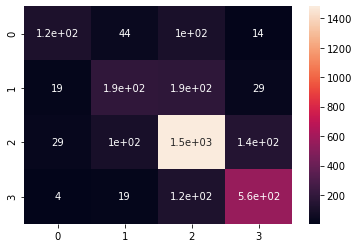

In [50]:
y_predict = lr.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [51]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

          -1       0.69      0.42      0.52       278
           0       0.54      0.45      0.49       425
           1       0.78      0.84      0.81      1755
           2       0.75      0.79      0.77       706

    accuracy                           0.74      3164
   macro avg       0.69      0.63      0.65      3164
weighted avg       0.73      0.74      0.73      3164



In [52]:
accuracy_score(y_test, y_predict)

0.7414664981036663

# Preparing for Submission - Clean Test dataset

In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [54]:
X_train = X
X_test = X_vect[len(train_df):]

In [55]:
X_train.shape

(15819, 41109)

In [56]:
X_test.shape

(10546, 41109)

In [57]:
lr = LogisticRegression(solver='liblinear')
model = lr.fit(X_train,y)

In [58]:
y_predict = lr.predict(X_test)

In [59]:
Output=pd.DataFrame(y_predict, columns=['sentiment'])
Output.head()

,sentiment
0,1
1,0
2,1
3,1
4,1


In [60]:
results = pd.DataFrame({'tweetid':test_df['tweetid']})
My_Submission = results.join(Output)
My_Submission.to_csv('Ndimphiwe_submission_3.csv',index=False)

In [61]:
My_Submission.head()

,tweetid,sentiment
0,169760,1
1,35326,0
2,224985,1
3,476263,1
4,872928,1
